In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import isodate

In [541]:
videos = pd.read_csv('./data/USvideos.csv')
videos.info()
videos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [542]:
videos['likes_log'] = np.log(videos['likes'] + 1)
videos['views_log'] = np.log(videos['views'] + 1)
videos['dislikes_log'] = np.log(videos['dislikes'] + 1)
videos['comment_log'] = np.log(videos['comment_count'] + 1)

Taking the log of each of these features shows the normal distribution.

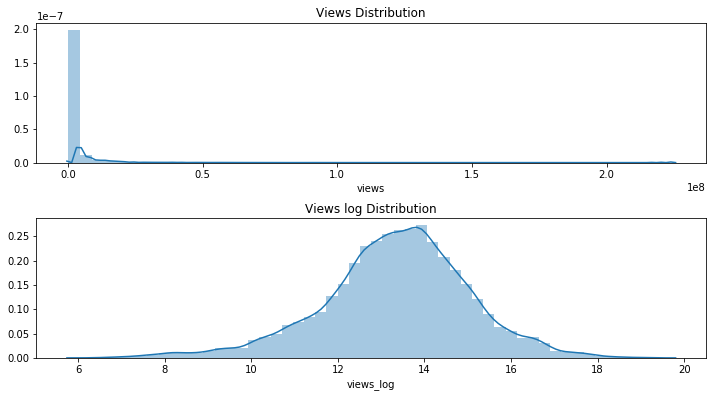

In [543]:
plt.figure(figsize = (12,6))

plt.subplot(211)
g1 = sns.distplot(videos['views'])
g1.set_title("Views Distribution")

plt.subplot(212)
g2 = sns.distplot(videos['views_log'])
g2.set_title('Views log Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

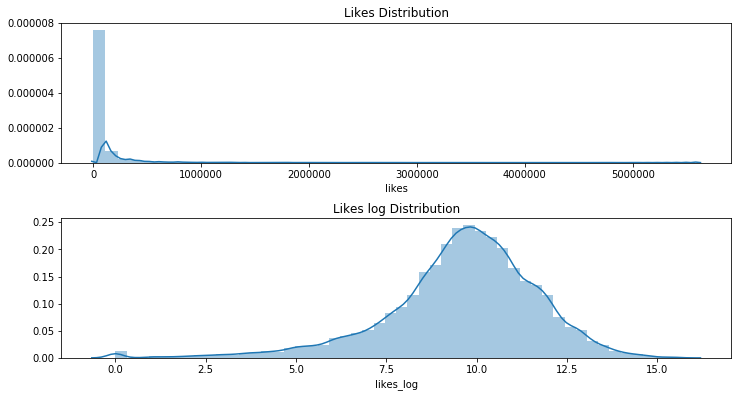

In [544]:
plt.figure(figsize = (12,6))

plt.subplot(211)
g1 = sns.distplot(videos['likes'])
g1.set_title("Likes Distribution")

plt.subplot(212)
g2 = sns.distplot(videos['likes_log'])
g2.set_title('Likes log Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

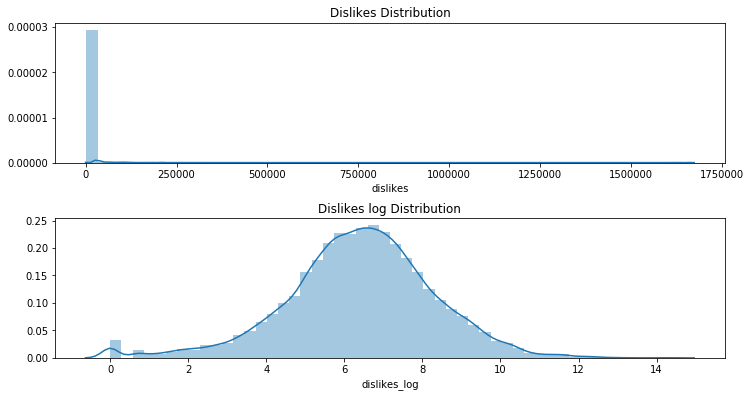

In [545]:
plt.figure(figsize = (12,6))

plt.subplot(211)
g1 = sns.distplot(videos['dislikes'])
g1.set_title("Dislikes Distribution")

plt.subplot(212)
g2 = sns.distplot(videos['dislikes_log'])
g2.set_title('Dislikes log Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

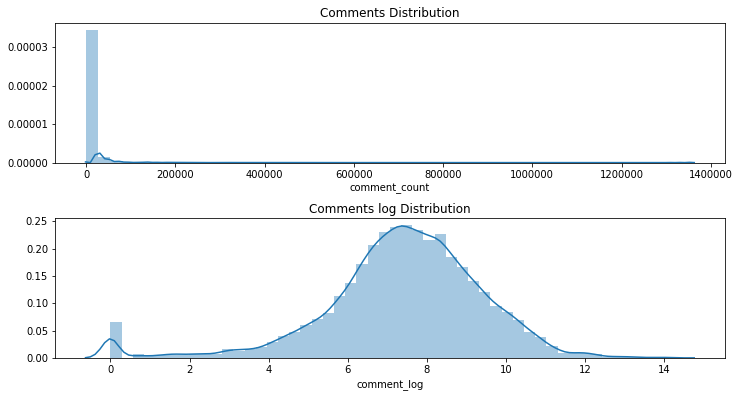

In [546]:
plt.figure(figsize = (12,6))

plt.subplot(211)
g1 = sns.distplot(videos['comment_count'])
g1.set_title("Comments Distribution")

plt.subplot(212)
g2 = sns.distplot(videos['comment_log'])
g2.set_title('Comments log Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Make category column boolean

In [547]:
encoding = pd.get_dummies(videos['category_id'], drop_first=True).add_suffix('_category')
encoding.head()
videos = videos.join(encoding)
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,20_category,22_category,23_category,24_category,25_category,26_category,27_category,28_category,29_category,43_category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,0,1,0,0,0,0,0,0,0,0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,0,0,0,1,0,0,0,0,0,0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,0,0,1,0,0,0,0,0,0,0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,0,0,0,1,0,0,0,0,0,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,0,0,0,1,0,0,0,0,0,0


In [548]:
videos['category_name'] = np.nan

videos.loc[(videos["category_id"] == 1),"category_name"] = 'Film and Animation'
videos.loc[(videos["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
videos.loc[(videos["category_id"] == 10),"category_name"] = 'Music'
videos.loc[(videos["category_id"] == 15),"category_name"] = 'Pets and Animals'
videos.loc[(videos["category_id"] == 17),"category_name"] = 'Sport'
videos.loc[(videos["category_id"] == 19),"category_name"] = 'Travel and Events'
videos.loc[(videos["category_id"] == 20),"category_name"] = 'Gaming'
videos.loc[(videos["category_id"] == 22),"category_name"] = 'People and Blogs'
videos.loc[(videos["category_id"] == 23),"category_name"] = 'Comedy'
videos.loc[(videos["category_id"] == 24),"category_name"] = 'Entertainment'
videos.loc[(videos["category_id"] == 25),"category_name"] = 'News and Politics'
videos.loc[(videos["category_id"] == 26),"category_name"] = 'How to and Style'
videos.loc[(videos["category_id"] == 27),"category_name"] = 'Education'
videos.loc[(videos["category_id"] == 28),"category_name"] = 'Science and Technology'
videos.loc[(videos["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
videos.loc[(videos["category_id"] == 25),"category_name"] = 'News & Politics'

In [549]:
videos['like_rate'] =  videos ['likes'] / videos['views'] * 100
videos['dislike_rate'] =  videos ['dislikes'] / videos['views'] * 100
videos['comment_rate'] =  videos ['comment_count'] / videos['views'] * 100

In [550]:
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
videos['publish_time'] = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos['publish_time_full'] = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [551]:
videos['time_to_trending'] = videos['trending_date'] - videos['publish_time']
videos['time_to_trending'] = [i.total_seconds() for i in videos['time_to_trending']]

In [552]:
videos['pub_month'] = videos['publish_time'].dt.month
videos['pub_julian'] = [i.timetuple().tm_yday for i in videos['publish_time']]

In [553]:
videos.insert(4, 'publish_date', videos['publish_time'].dt.date)
videos['publish_time'] = videos['publish_time'].dt.time
videos[['pub_hour','pub_min','pub_sec']] = videos['publish_time'].astype(str).str.split(':', expand=True).astype(int)

In [554]:
videos.info()
videos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 47 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
publish_date              40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
likes_log                 40949 non-null float64
views_log                 409

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,like_rate,dislike_rate,comment_rate,publish_time_full,time_to_trending,pub_month,pub_julian,pub_hour,pub_min,pub_sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,7.686932,0.396326,2.131822,2017-11-13 17:13:01,24419.0,11,317,17,13,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,4.017930,0.254095,0.525181,2017-11-13 07:30:00,59400.0,11,317,7,30,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,4.575780,0.167292,0.256342,2017-11-12 19:05:24,104076.0,11,316,19,5,24
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,2.964146,0.194074,0.625350,2017-11-13 11:00:04,46796.0,11,317,11,0,4
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,6.309732,0.094907,0.835890,2017-11-12 18:01:41,107899.0,11,316,18,1,41


In [555]:
[print(i, '\t\t', type(videos[i][0])) for i in videos.columns]
None

video_id 		 <class 'str'>
trending_date 		 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
title 		 <class 'str'>
channel_title 		 <class 'str'>
publish_date 		 <class 'datetime.date'>
category_id 		 <class 'numpy.int64'>
publish_time 		 <class 'datetime.time'>
tags 		 <class 'str'>
views 		 <class 'numpy.int64'>
likes 		 <class 'numpy.int64'>
dislikes 		 <class 'numpy.int64'>
comment_count 		 <class 'numpy.int64'>
thumbnail_link 		 <class 'str'>
comments_disabled 		 <class 'numpy.bool_'>
ratings_disabled 		 <class 'numpy.bool_'>
video_error_or_removed 		 <class 'numpy.bool_'>
description 		 <class 'str'>
likes_log 		 <class 'numpy.float64'>
views_log 		 <class 'numpy.float64'>
dislikes_log 		 <class 'numpy.float64'>
comment_log 		 <class 'numpy.float64'>
2_category 		 <class 'numpy.uint8'>
10_category 		 <class 'numpy.uint8'>
15_category 		 <class 'numpy.uint8'>
17_category 		 <class 'numpy.uint8'>
19_category 		 <class 'numpy.uint8'>
20_category 		 <class 'numpy.uint8'>
22_categor

In [556]:
videos.isnull().sum(axis=0)

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_date                0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
likes_log                   0
views_log                   0
dislikes_log                0
comment_log                 0
2_category                  0
10_category                 0
15_category                 0
17_category                 0
19_category                 0
20_category                 0
22_category                 0
23_category                 0
24_category                 0
25_category                 0
26_category                 0
27_category                 0
28_categor

In [557]:
durations = pd.read_csv('./scraps/durationUS.csv')
durations.head()

,video_id,duration
0,2kyS6SvSYSE,PT11M18S
1,1ZAPwfrtAFY,PT23M51S
2,5qpjK5DgCt4,PT9M29S
3,puqaWrEC7tY,PT7M10S
4,d380meD0W0M,PT12M13S


In [558]:
durdic = {
    row['video_id'] : 
        (
#             print(row['duration']),
            isodate.parse_duration(row['duration']).total_seconds()
            if str(row['duration']) != 'nan'
            else None
        )
    for index, row in durations.iterrows()
}
durdic['2kyS6SvSYSE']

678.0

In [559]:
videos['duration'] = [(durdic[row['video_id']] if row['video_id'] in durdic.keys() else None) for index, row in videos.iterrows()]
videos.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,dislike_rate,comment_rate,publish_time_full,time_to_trending,pub_month,pub_julian,pub_hour,pub_min,pub_sec,duration
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,0.396326,2.131822,2017-11-13 17:13:01,24419.0,11,317,17,13,1,678.0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,0.254095,0.525181,2017-11-13 07:30:00,59400.0,11,317,7,30,0,1431.0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,0.167292,0.256342,2017-11-12 19:05:24,104076.0,11,316,19,5,24,569.0
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,0.194074,0.625350,2017-11-13 11:00:04,46796.0,11,317,11,0,4,430.0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,0.094907,0.835890,2017-11-12 18:01:41,107899.0,11,316,18,1,41,733.0


In [560]:
videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_date',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', '2_category',
       '10_category', '15_category', '17_category', '19_category',
       '20_category', '22_category', '23_category', '24_category',
       '25_category', '26_category', '27_category', '28_category',
       '29_category', '43_category', 'category_name', 'like_rate',
       'dislike_rate', 'comment_rate', 'publish_time_full', 'time_to_trending',
       'pub_month', 'pub_julian', 'pub_hour', 'pub_min', 'pub_sec',
       'duration'],
      dtype='object')

In [584]:
relevant = [
    'views', 'likes', 'dislikes',
    'comment_count','comments_disabled',
    'ratings_disabled',
    'likes_log', 'views_log', 'dislikes_log', 'comment_log', '2_category',
    '10_category', '15_category', '17_category', '19_category',
    '20_category', '22_category', '23_category', '24_category',
    '25_category', '26_category', '27_category', '28_category',
    '29_category', '43_category', 'like_rate',
    'dislike_rate', 'time_to_trending', 'comment_rate', 'pub_month', 'pub_hour', 'pub_min', 'pub_sec',
    'duration'
]
user_ins = [
    'comments_disabled',
    'ratings_disabled',
    '2_category',
    '10_category', '15_category', '17_category', '19_category',
    '20_category', '22_category', '23_category', '24_category',
    '25_category', '26_category', '27_category', '28_category',
    '29_category', '43_category', 'pub_julian',
    'pub_month', 'pub_hour', 'pub_min', 'pub_sec',
    'duration'
]
targets = [
    'views', 'likes', 'dislikes',
    'comment_count', 'like_rate',
    'time_to_trending'
]

In [562]:
train = videos[relevant]
train.dtypes

views                  int64
likes                  int64
dislikes               int64
comment_count          int64
comments_disabled       bool
ratings_disabled        bool
likes_log            float64
views_log            float64
dislikes_log         float64
comment_log          float64
2_category             uint8
10_category            uint8
15_category            uint8
17_category            uint8
19_category            uint8
20_category            uint8
22_category            uint8
23_category            uint8
24_category            uint8
25_category            uint8
26_category            uint8
27_category            uint8
28_category            uint8
29_category            uint8
43_category            uint8
like_rate            float64
dislike_rate         float64
time_to_trending     float64
comment_rate         float64
pub_month              int64
pub_hour               int64
pub_min                int64
pub_sec                int64
duration             float64
dtype: object

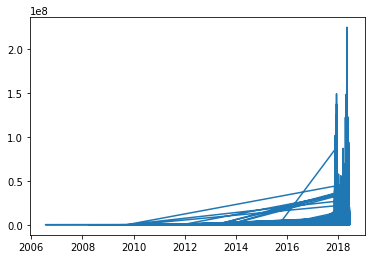

In [580]:
tmp = videos.copy()
tmp = tmp.set_index('publish_time_full').sort_index()
plt.plot(videos['publish_time_full'], videos['views'])

In [588]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [597]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [591]:
videos.isnull().sum(axis=0)

video_id                     0
trending_date                0
title                        0
channel_title                0
publish_date                 0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                570
likes_log                    0
views_log                    0
dislikes_log                 0
comment_log                  0
2_category                   0
10_category                  0
15_category                  0
17_category                  0
19_category                  0
20_category                  0
22_category                  0
23_category                  0
24_category                  0
25_category                  0
26_category                  0
27_categ

In [592]:
videos.dropna(subset=['duration'], inplace=True)
videos.isnull().sum(axis=0)

video_id                    0
trending_date               0
title                       0
channel_title               0
publish_date                0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               527
likes_log                   0
views_log                   0
dislikes_log                0
comment_log                 0
2_category                  0
10_category                 0
15_category                 0
17_category                 0
19_category                 0
20_category                 0
22_category                 0
23_category                 0
24_category                 0
25_category                 0
26_category                 0
27_category                 0
28_categor

In [601]:
X = videos[user_ins]
Y = videos['like_rate']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [594]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

ScaledLR: -6.163804 (1.296751)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

ScaledLASSO: -7.278512 (1.608058)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

ScaledEN: -7.201004 (1.596376)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params

ScaledKNN: -7.109599 (2.361976)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

ScaledCART: -7.138468 (2.502991)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/

ScaledGBM: -5.581339 (1.078661)


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [596]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  


-5.725638 (1.116514) with: {'n_estimators': 50}
-5.578574 (1.080167) with: {'n_estimators': 100}
-5.595140 (1.167019) with: {'n_estimators': 200}
-5.650577 (1.259219) with: {'n_estimators': 300}
-5.747558 (1.417153) with: {'n_estimators': 400}
Best: -5.578574 using {'n_estimators': 100}


In [622]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=100)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  


5.030073213678835


/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [605]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
36949,2.837106,1.853824
20976,4.779440,2.210468
39988,2.549354,1.866735
24891,3.726529,5.124854
1635,2.622319,3.896957
33373,3.492673,1.347326
2474,4.368833,3.412973
1750,5.037915,5.709191
13847,2.663386,0.504117
39952,2.767441,5.475121


In [620]:
tmp = {
    'comments_disabled': [False],
    'ratings_disabled': [False],
    '2_category': [0],
    '10_category': [0], '15_category': [0], '17_category': [0], '19_category': [0],
    '20_category': [0], '22_category': [0], '23_category': [0], '24_category': [0],
    '25_category': [0], '26_category': [0], '27_category': [0], '28_category': [0],
    '29_category': [0], '43_category': [0], 'pub_julian': [15],
    'pub_month': [1], 'pub_hour': [1], 'pub_min': [40], 'pub_sec': [15],
    'duration': [600]
}

tmpdf = pd.DataFrame(tmp)
X_tmp = tmpdf[user_ins]

In [621]:
rescaled_X_test = scaler.transform(X_tmp)
predictions = model.predict(rescaled_X_test)
predictions

/home/andres/anaconda3/envs/jupyterr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([3.9992015])